In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


2024-06-18 09:10:24.163060: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-18 09:10:24.469076: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 09:10:24.469117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 09:10:24.494055: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-18 09:10:24.547679: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('GenderClassificationDataset/Training',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

validation_set = test_datagen.flow_from_directory('GenderClassificationDataset/Validation',
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')


Found 47009 images belonging to 2 classes.
Found 11650 images belonging to 2 classes.


In [3]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add more layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


2024-06-18 09:10:33.316788: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79072 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:ca:00.0, compute capability: 8.0


In [4]:
history = model.fit(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=300,
                    validation_data=validation_set,
                    validation_steps=len(validation_set))


Epoch 1/300


2024-06-18 09:10:38.757689: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-06-18 09:10:40.712769: I external/local_xla/xla/service/service.cc:168] XLA service 0x7a3ed10354d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-18 09:10:40.712816: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2024-06-18 09:10:40.724487: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1718682040.845642   25473 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1470/1470 [==============================] - 74s 47ms/step - loss: 0.2873 - accuracy: 0.8774 - val_loss: 0.1471 - val_accuracy: 0.9456
Epoch 2/300
1470/1470 [==============================] - 62s 42ms/step - loss: 0.1761 - accuracy: 0.9359 - val_loss: 0.1248 - val_accuracy: 0.9544
Epoch 3/300
1470/1470 [==============================] - 61s 42ms/step - loss: 0.1582 - accuracy: 0.9435 - val_loss: 0.1300 - val_accuracy: 0.9502
Epoch 4/300
1470/1470 [==============================] - 62s 42ms/step - loss: 0.1487 - accuracy: 0.9466 - val_loss: 0.1120 - val_accuracy: 0.9586
Epoch 5/300
1470/1470 [==============================] - 65s 44ms/step - loss: 0.1459 - accuracy: 0.9480 - val_loss: 0.1079 - val_accuracy: 0.9625
Epoch 6/300
1470/1470 [==============================] - 63s 43ms/step - loss: 0.1362 - accuracy: 0.9521 - val_loss: 0.1105 - val_accuracy: 0.9570
Epoch 7/300
1470/1470 [==============================] - 61s 41ms/step - loss: 0.1321 - accuracy: 0.9532 - val_loss: 0.1094 - val_

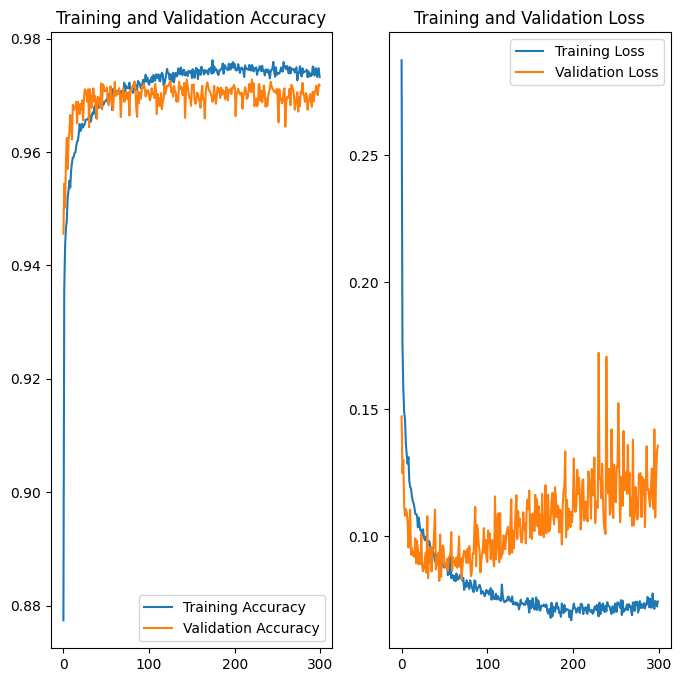

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(300)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [6]:
model.save('gender_classifier-with300-epoch.h5')

/home/rajesh/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
## Using trained model for classification task

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [8]:
model = tf.keras.models.load_model('gender_classifier.h5')


In [9]:
# Preprocess the Image for Prediction:

# The image should be preprocessed in the same way as the training data.

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image to match training conditions
    return img_array

In [10]:
# Make a Prediction:
def predict_gender(img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    return 'male' if prediction < 0.5 else 'female'

In [15]:
# Test the Prediction:

# Provide the path to an image and call the predict_gender function.

img_path = 'Untitdled.jpeg'
gender = predict_gender(img_path)
print(f'The predicted gender is: {gender}')


1/1 [==============================] - 0s 110ms/step
The predicted gender is: female


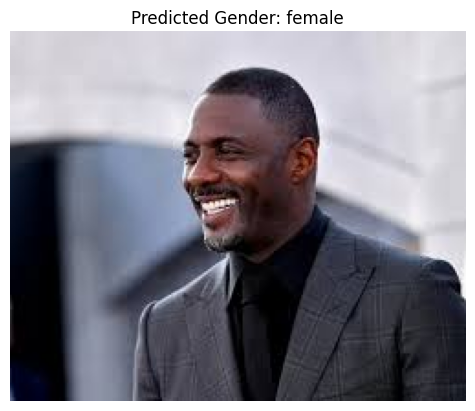

In [16]:
# Visualize the Image and Prediction (Optional):

# This step helps to visually confirm that the image matches the prediction.

def display_image(img_path, gender):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Predicted Gender: {gender}')
    plt.axis('off')
    plt.show()

# Display the image and prediction
display_image(img_path, gender)


In [17]:
# Full Example Code:

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('gender_classifier.h5')

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image to match training conditions
    return img_array

# Function to predict gender
def predict_gender(img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    return 'male' if prediction < 0.5 else 'female'

# Function to display the image with prediction
def display_image(img_path, gender):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Predicted Gender: {gender}')
    plt.axis('off')
    plt.show()

# Provide the path to an image
img_path = 'path/to/your/test/image.jpg'

# Predict the gender
gender = predict_gender(img_path)

# Display the image and prediction
display_image(img_path, gender)

# Print the predicted gender
print(f'The predicted gender is: {gender}')



FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/test/image.jpg'

In [ ]:

# you can use the saved model to classify gender from a live camera feed. To do this, you'll need to capture video frames from your webcam, preprocess each frame, and then use the model to make predictions in real-time. Below is a step-by-step guide on how to achieve this:

# Step-by-Step Guide:




import tensorflow as tf
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model = tf.keras.models.load_model('gender_classifier.h5')

# Function to preprocess the frame
def preprocess_frame(frame):
    img_array = cv2.resize(frame, (64, 64))
    img_array = image.img_to_array(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image to match training conditions
    return img_array

# Function to predict gender from a frame
def predict_gender(frame):
    preprocessed_frame = preprocess_frame(frame)
    prediction = model.predict(preprocessed_frame)
    return 'Male' if prediction < 0.5 else 'Female'

# Function to capture live video and classify gender
def live_gender_classification():
    # Initialize webcam
    cap = cv2.VideoCapture(0)

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        if not ret:
            break

        # Predict gender
        gender = predict_gender(frame)

        # Display the resulting frame
        cv2.putText(frame, f'Predicted Gender: {gender}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.imshow('Gender Classification', frame)

        # Break the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # When everything is done, release the capture and close windows
    cap.release()
    cv2.destroyAllWindows()

# Run the live gender classification
live_gender_classification()
